In [1]:
import os
print(os.getcwd())

C:\Users\bharg


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd

df = pd.read_csv(r"C:\Users\bharg\fake_reviews_dataset.csv")
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [17]:
# Drop the 'category' and 'rating' columns if not required for the model
df = df.drop(columns=["category", "rating"])

# Convert 'CG' (fake) to 1 and real labels (likely 'OG') to 0
df['label'] = df['label'].apply(lambda x: 1 if x == 'CG' else 0)

# Check the cleaned data
df.head()

,label,text_
0,1,"Love this! Well made, sturdy, and very comfor..."
1,1,"love it, a great upgrade from the original. I..."
2,1,This pillow saved my back. I love the look and...
3,1,"Missing information on how to use it, but it i..."
4,1,Very nice set. Good quality. We have had the s...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)

# Vectorize the review text
X = vectorizer.fit_transform(df['text_'])

# Define the target variable
y = df['label']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32345, 3000) (8087, 3000) (32345,) (8087,)


In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4071
           1       0.86      0.84      0.85      4016

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



In [27]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, "fake_review_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

Classification Report:

              precision    recall  f1-score   support

 Real Review       0.85      0.87      0.86      4071
 Fake Review       0.86      0.84      0.85      4016

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087

Accuracy: 0.86


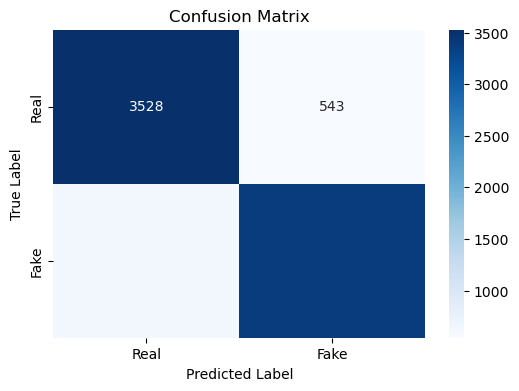

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Real Review", "Fake Review"]))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"],
            yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
code = '''
from flask import Flask, request, jsonify
import joblib

# Load the model and vectorizer
model = joblib.load("fake_review_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Initialize Flask app
app = Flask(__name__)

# Define prediction route
@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    
    # Get the review text
    review_text = data.get("review")

    if not review_text:
        return jsonify({"error": "No review provided"}), 400

    # Transform text using vectorizer
    vect_text = vectorizer.transform([review_text])

    # Make prediction
    prediction = model.predict(vect_text)[0]

    # Convert to label
    label = "Fake Review" if prediction == 1 else "Real Review"

    return jsonify({"prediction": label})

# Run the app
if __name__ == "__main__":
    app.run(debug=True)
'''

# Save to app.py
with open("app.py", "w") as f:
    f.write(code)

print("app.py created!")


app.py created!
